**Chose targets sandbox**
For checking how the choose_targets code works with some sample data

In [30]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [1]:
def choose_targets(df_targets, size, n_instances, weighting=True, verbose=0):
    "Choose recommended double and triple targets for CRISPRi knockdown"

    targets_list = list(df_targets['Target'])
    targets = set()
    tries = 0
    if weighting:
        weights = df_targets['Weight']
    else:
        weights = None
    
    while len(targets) < n_instances:
        new_target = tuple(sorted(random.sample(
            targets_list, counts=weights, k=size
        ))) # random sampling without replacement
        # new_target = sorted(random.choices(targets_list, weights=weights, k=size))
        # Check that the targets are not the same (sample function could provide repeated targets)
        # and if the combination was already chosen
        if len(set(new_target)) == size and new_target not in targets:
            targets.add(new_target)
        tries += 1
        
    if verbose:
        print(tries)
        
    return list(targets)

[1, 11, 21, 31, 41, 51, 61]


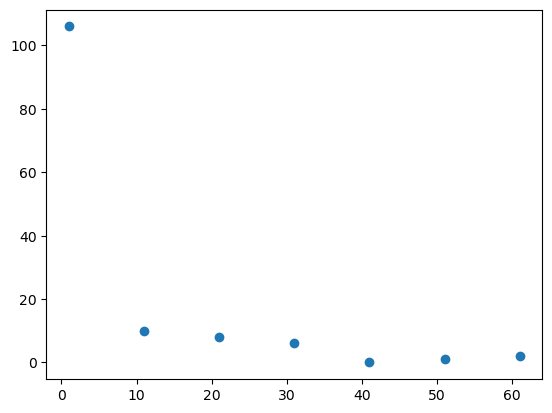

In [33]:
gene = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
wts = np.ones((len(gene),1)).astype(int)
wts = [1]*len(gene)
wts = [1+(ii*10) for ii in range(len(gene))]

print(wts)
targets = set()
tries = 0
n_samples = 100
all_samples = []
for ii in range(n_samples):
    new_target = tuple(sorted(random.sample(gene, counts = wts, k=2)))
    all_samples.append(new_target[0])
    all_samples.append(new_target[1])
all_samples.index('a')
sample_counts = [all_samples.index(g) for g in gene]
#Plot
plt.figure()
plt.scatter(wts, sample_counts)





In [35]:
#Check if current code chooses between ['a', 'b'] and ['b', 'a']

c1 = ['a', 'b']
c2 = ['b','a']

sorted1 = sorted(c1)
print(sorted1)
sorted2 = sorted(c2)
print(sorted2)

['a', 'b']
['a', 'b']
